# 分类问题性能评估
- 错误率 | 精度(`accuracy`)：被错误 | 正确预测的样本数占总样本的比率
    
对于二分类：
- 查准率(`precision`)：预测为正样本的样本中的准确率
- 查全率(`recall`)：正样本的预测准确率
- `F1 score`：
 $F_1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}$
 
为什么需要这些指标：
- 数据不平衡，如 98% 邮件都是垃圾邮件，模型检测是否垃圾邮件？将所有邮件都归为垃圾邮件，此时精度仍有 98%
- 例如针对儿童的视频分类器，该分类器可能误屏蔽很多好视频(`low recall`)，但是坏视频的准确率必须要很高(`high precision`)
     
`Precision/Recall Tradeoff`，如下图所示：十个数字，预测为 5 的概率从左至右依次增大，当判断是否为 5 的阈值改变时，对应的 `precision/recall` 相应会发生变化，`precision` 越大，`recall` 越小，反之也成立
![](images/DecisionThreshold_PrecisionRecallTradeoff.png)

 
 
 
`ROC` 曲线，纵轴是真正例率(`True Positive Rate`)，横轴是假正例率(`False Positive Rate`)
 

In [5]:
# TP、TN、FP、FN
def getTP(y_true, y_pred):
    return sum((y_true == 1) & (y_pred == 1))


def getTN(y_true, y_pred):
    return sum((y_true == 0) & (y_pred == 0))


def getFP(y_true, y_pred):
    return sum((y_true == 0) & (y_pred == 1))


def getFN(y_true, y_pred):
    return sum((y_true == 1) & (y_pred == 0))

In [14]:
# confusion matrix
def confusion_matrix(y_true, y_pred):
    TP = getTP(y_true, y_pred)
    TN = getTN(y_true, y_pred)
    FP = getFP(y_true, y_pred)
    FN = getFN(y_true, y_pred)
    return np.array([[TN, FP], [FN, TP]])

In [ ]:
# 精度
def accuracy(y_true, y_pred):
    return sum(y_true == y_pred) / len(y_true)

In [16]:
# 查全率：所有正样本中，正确预测的比率
def recall(y_true, y_pred):
    TP = getTp(y_true, y_pred)
    FN = getFN(y_true, y_pred)
    return TP / (TP + FN)

array([ True,  True, False,  True, False,  True, False,  True,  True,
        True])

In [ ]:
# 查准率：预测为正的所有样本中，正样本的比率
def precision(y_true, y_pred):
    TP = getTP(y_true, y_pred)
    FP = getFP(y_true, y_pred)
    return TP / (TP + FP)

In [ ]:
# f1 score：是查全率与查准率的调和平均值，其值越大越好
def f1_score(y_true, y_pred):
    r = recall(y_true, y_pred)
    p = precision(y_true, y_pred)
    return 2 * r * p / (r + p)

In [7]:
# sklearn API
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, accuracy_score

y = [0] * 5 + [1] * 5
y_pred = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]

print("精度为   :", accuracy_score(y, y_pred))
print("查准率   :", precision_score(y, y_pred))
print("查全率   :", recall_score(y, y_pred))
print("F1 score:", f1_score(y, y_pred))

精度为   : 0.7
查准率   : 0.6666666666666666
查全率   : 0.8
F1 score: 0.7272727272727272


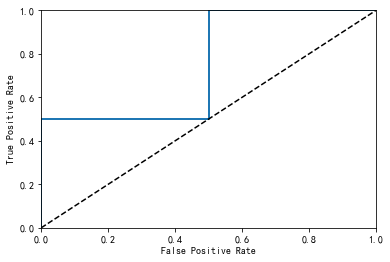

In [27]:
# ROC 曲线
# 得到预测概率后，设定阈值，得到预测标签；
# 改变阈值，性能指标值就会发生变化
# 当没有设定阈值时，如何评估模型?
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_true = np.array([1, 1, 2, 2])
y_score = np.array([0.1, 0.4, 0.35, 0.8])

fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=2)
# 返回每个阈值对应的真阳性率、假阳性率及阈值列表


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(fpr, tpr)
plt.show()

# 逻辑回归
- 逻辑回归用于解决分类问题，而不是回归问题；基本思想是：对数据的分类边界建立回归公式，以此进行分类
    - 逻辑回归的本质： 极大似然估计
    - 逻辑回归的激活函数：Sigmoid
    - 逻辑回归的代价函数：交叉熵


- 逻辑回归评估样本属于某一类的概率，通常概率大于 `50%` ，模型就会预测该样本属于该类，否者不属于
- 逻辑回归模型：
$$\hat{p}=h_\theta(X)=\sigma(\theta^T\cdot X)\quad \sigma(t)=\frac{1}{1+exp(-t)}$$
$$\hat{y}=\begin{cases} 0\qquad \hat{p}<0.5,\\1\qquad  \hat{p}\geq 0.5.\end{cases}$$
- 损失函数：
    - 模型在单个样本上的损失：
        $$c(\theta)=\begin{cases}-log(\hat{p})\qquad y=1\\-log(1-\hat{p})\ \ y=0
    \end{cases}$$
        - 当 $t$ 接近 $0$ ，$-log(t)$ 变得非常大；即当模型预测错误，样本属于正确类别的概率很低，损失越大。
    - 损失函数：
        $$J(\theta)=-\frac{1}{m}\sum_{i=1}^m [y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$$
        - 逻辑回归损失函数没有完全解，但为凸函数，梯度下降法保证可以找到最小值
    - 损失函数的梯度：
    $$\frac{\partial}{\partial \theta_j}J(\theta)=\frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^T\cdot X^{(i)})-y^{(i)})x_j^{(i)}
$$

-------------------------

```
class sklearn.linear_model.LogisticRegression(penalty=’l2’, 
                                              dual=False, 
                                              tol=0.0001, 
                                              C=1.0, 
                                              fit_intercept=True, 
                                              intercept_scaling=1, 
                                              class_weight=None, 
                                              random_state=None, 
                                              solver=’warn’, 
                                              max_iter=100, 
                                              multi_class=’warn’, 
                                              verbose=0, 
                                              warm_start=False, 
                                              n_jobs=None, 
                                              l1_ratio=None)
```
- 参数：
    - penalty：正则化类型，l1 通过系数矩阵的系数绝对值之和， l2 通过系数矩阵系数的平方和，底层使用不同的数学求解器
    - C：惩罚系数，正值， 值越大，系数越接近于0
    - class_weight：类别权重，默认为None，即不给定时，所有类别权重为 1；或词典形式`{class_label: weight}`；或 ‘balanced’，`n_samples / (n_classes * np.bincount(y))`
    - solver：底层的求解算法
    - max_iter：最大迭代次数


# Softmax Regression
- 多分类模型，或多维逻辑回归；
- 首先计算出样本对每个类别的权重，然后 `softmax function` 求出样本属于每一类的概率，最后输出最大概率对应的类别
    - $S_k(X)=\theta_k^T\cdot X$
    - $\hat{p}_k=\sigma(S(X))_k=\frac{exp(S_k(X))}{\sum_{j=1}^k exp(S_j(X))}$
    - $\hat{y}=argmax_{k}\ \sigma(S(X))_k=argmax_{k}(\theta_k^T\cdot X)$
- 交叉熵损失函数：
$$J(\Theta)=-\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^Ky_k^{(i)}log(\hat{p}_k^{(i)})$$ 
    - 样本共有 $K$ 个类别
    - $y_k^{(i)}$ 为 1 ，当样本 $i$ 属于第 $k$ 类时，否者为 0
- 类别 $k$ 的梯度向量：
$$\nabla_{\theta_k}J(\Theta)=\frac{1}{m}\sum_{i=1}^m(\hat{p}_k^{(i)}-y_k^{(i)})X^{(i)}$$

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris=load_iris()
X=iris.data[:,(2,3)]
y=iris.target

softmax_reg=LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)

softmax_reg.predict_proba([[5,2]])
# 三分类，样本 [5,2] 属于每一类的概率

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# 多分类

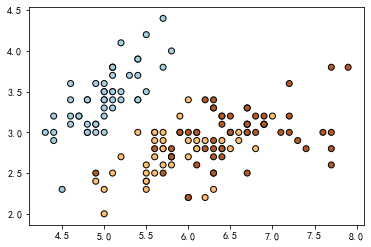

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# 三分类
iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target

plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

In [15]:
# 逻辑回归的多分类
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(x, y)

/home/yangbin7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yangbin7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
h = 0.02
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

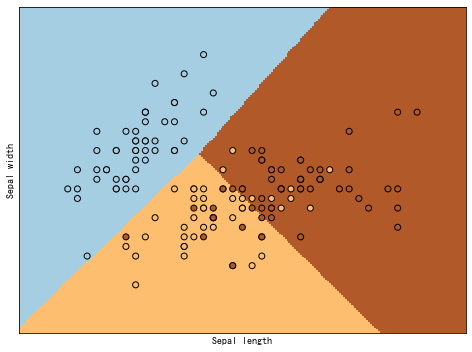

In [17]:
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)

plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

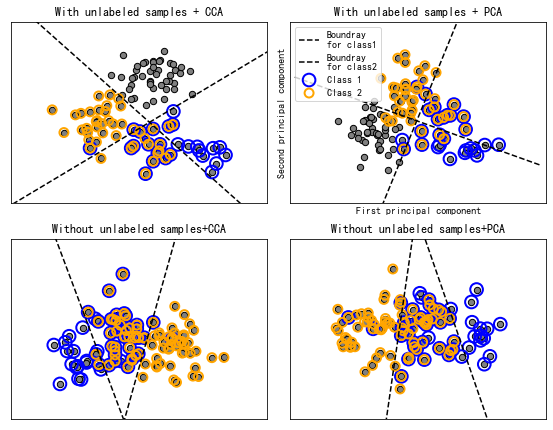

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    w = clf.coef_[0]
    a = -w[0] / w[1]

    xx = np.linspace(min_x - 5, max_x + 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(x, y, subplot, title, transform):
    if transform == 'pca':
        x = PCA(n_components=2).fit_transform(x)
    elif transform == 'cca':
        x = CCA(n_components=2).fit(x, y).transform(x)
    else:
        raise ValueError

    min_x = np.min(x[:, 0])
    max_x = np.max(x[:, 0])
    min_y = np.min(x[:, 1])
    max_y = np.max(x[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(x, y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(y[:, 0])
    one_class = np.where(y[:, 1])

    plt.scatter(x[:, 0], x[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
    plt.scatter(x[zero_class, 0],
                x[zero_class, 1],
                s=160,
                edgecolors='b',
                facecolors='none',
                linewidth=2,
                label='Class 1')
    plt.scatter(x[one_class, 0],
                x[one_class, 1],
                s=80,
                edgecolors='orange',
                facecolors='none',
                linewidth=2,
                label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundray\nfor class1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k--',
                    'Boundray\nfor class2')

    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - 0.5 * max_x, max_x + 0.5 * max_x)
    plt.ylim(min_y - 0.5 * max_y, max_y + 0.5 * max_y)

    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

X, Y = make_multilabel_classification(n_classes=2,
                                      n_labels=1,
                                      allow_unlabeled=True,
                                      random_state=1)

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

x, y = make_multilabel_classification(n_classes=2,
                                      n_labels=1,
                                      allow_unlabeled=False,
                                      random_state=1)

plot_subfigure(x, y, 3, "Without unlabeled samples+CCA", "cca")
plot_subfigure(x, y, 4, "Without unlabeled samples+PCA", "pca")

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()